#### 问题1：请使用numpy来实现梯度下降并做一个单变量的线性回归。使用prob1.dat数据来验证你的算法。
#### 下面，我们将使用y = wX + b来表示该线性回归。


In [71]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

'''
This problem is adapted from the course materials of IST 597 at Penn State University.
Thanks to the contribution of Alexander G. Ororbia II.
'''

# NOTE: 更新的步长、收敛标准和更新轮数
# meta-parameters for program
alpha = 0.01 # step size coefficient (learning rate)
eps = 1e-8 # controls convergence criterion epsilon, (tolerance)
n_epoch = 10000 # number of epochs (full passes through the dataset)

In [72]:
def regress(X, theta):
    # 给定X和theta,输出y的预测值
    m = np.shape(X)[0]
    b = theta[0]
    w = theta[1]
    y_hat = np.repeat(b[None, :], m, axis=0) + np.dot(X, w.transpose())
    return y_hat


def computeCost(X, y, theta):
    # 计算当前的Rooted Mean Squared Error (RMSE)
    m = np.shape(y)[0]
    y_hat = regress(X, theta)
    loss = 1/(2*m)*np.sum(np.square(y_hat - y))
    # loss = np.sqrt(np.sum(np.square(y_hat - y))/m)  # standard RMSE
    return loss


def computeGrad(X, y, theta):
    # TODO - 请重写该函数，计算梯度
    b, w = theta
    m = y.shape[0]
    dL_db = (np.sum(X*w-y))/m+b
    #??????w原来不是向量啊那没事了
    dL_dw = np.sum((np.power(X, 2))*w + X*(np.repeat(b[None, :], m, axis=0)-y))/m
    nabla = (dL_db, dL_dw)
    return nabla


In [73]:
# 开始

path = os.getcwd() + '/prob1.dat'  
data = pd.read_csv(path, header=None, names=['X', 'Y']) 

data.describe()

# 转换数据
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 

X = np.array(X.values)  
y = np.array(y.values)

# 初始化线性回归的参数
w = np.zeros((1,X.shape[1]))
b = np.array([0])
theta = (b, w)

In [74]:
# 第一次计算loss
L = computeCost(X, y, theta)
print("-1 L = {0}".format(L))
L_best = L
i = 0
cost = []
while(i < n_epoch):
    # TODO - 计算梯度，更新theta，计算loss，打印loss
    nabla = computeGrad(X, y, theta)
    b = b - nabla[0]*alpha
    w = w - nabla[1]*alpha
    theta = (b,w)    
    L = computeCost(X, y, theta)
    print("{0} L = {1}".format(i,L))
    i += 1
    cost.append(L)
    if abs(L - L_best)<eps:
        print('converge after {} rounds, final Loss: {}'.format(i, L_best))
        break
    L_best = min(L_best, L)
    
# print parameter values found after the search
print("w = ",w)
print("b = ",b)

-1 L = 32.072733877455676
0 L = 6.7371904648700065
1 L = 5.9315935686049555
2 L = 5.901154707081388
3 L = 5.895228586444221
4 L = 5.8900949431173295
5 L = 5.885004158443647
6 L = 5.879932480491418
7 L = 5.874879094762575
8 L = 5.869843911806385
9 L = 5.86482686531293
10 L = 5.859827889932181
11 L = 5.85484692057229
12 L = 5.849883892376587
13 L = 5.844938740722034
14 L = 5.840011401218361
15 L = 5.8351018097072265
16 L = 5.830209902261388
17 L = 5.825335615183863
18 L = 5.820478885007099
19 L = 5.815639648492154
20 L = 5.810817842627869
21 L = 5.806013404630044
22 L = 5.801226271940628
23 L = 5.7964563822269
24 L = 5.7917036733806535
25 L = 5.7869680835173956
26 L = 5.782249550975539
27 L = 5.777548014315596
28 L = 5.7728634123193805
29 L = 5.768195683989213
30 L = 5.76354476854712
31 L = 5.758910605434047
32 L = 5.754293134309077
33 L = 5.749692295048628
34 L = 5.745108027745684
35 L = 5.740540272709012
36 L = 5.735988970462381
37 L = 5.731454061743792
38 L = 5.726935487504702
39 L = 

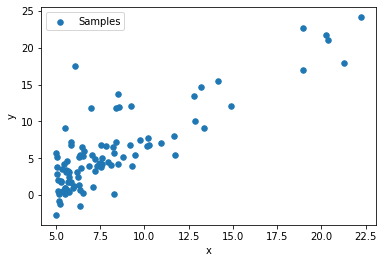

In [75]:
# 画出数据点
plt.scatter(X[:,0], y, s=30, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.savefig(os.path.join("prob1.png"))
plt.show()

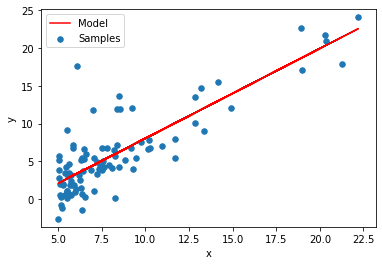

In [76]:
# 画出数据点和拟合的曲线
plt.plot(X, regress(X, theta), color='r', label="Model")
plt.scatter(X[:, 0], y, s=30, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((np.amin(X)-1, np.amax(X)+1))
plt.ylim((np.amin(y)-1, np.amax(y)+1))
plt.legend(loc="best")
plt.savefig(str(alpha) + "_fit.png")
plt.show()


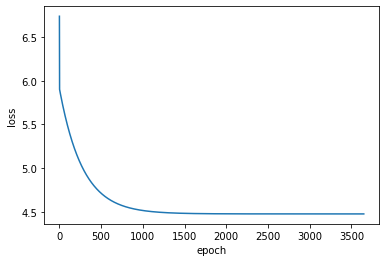

In [77]:
# 画出loss收敛过程的曲线
plt.plot([i+1 for i in range(len(cost))], cost, label = "loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig(str(alpha) + "_loss.png")
plt.show()